In [9]:
from sklearn.datasets import make_blobs, make_moons
import torch
from torch import nn
import pandas as pd
import seaborn as sns
import seaborn
from torch.optim import SGD
import torch.functional as F
import numpy as np

RANDOM_STATE = 45

np.random.seed(RANDOM_STATE)

import matplotlib.pyplot as plt
%matplotlib inline

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


def plot_decision_boundry(net, X, line='g--'):
    W = net.fc.weight[0].detach().cpu().numpy()
    b = net.fc.bias.detach().cpu().numpy()
    f = lambda x: (-W[0]/W[1]) * x +  (-b/W[1])
    dziedz = np.arange(-1, 1, 0.01)
    plt.plot(dziedz, f(dziedz), line) 
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))

# Prepare and Visualize data

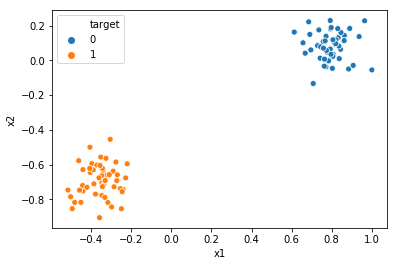

In [10]:
N_FEATURES = 2


X, Y = make_blobs(centers=2, center_box=(-10, 10), random_state=RANDOM_STATE, n_features=N_FEATURES)
# X, Y = make_moons()

X = X/np.abs(X).max()
# Y_one_hot = ohe.fit_transform(Y.reshape(-1, 1)).toarray()

data = pd.DataFrame(X, columns=['x1', 'x2'])
data['target'] = Y
seaborn.scatterplot(x='x1',y='x2', hue='target', data=data)

# Define the perceptron


![alt text](https://i.stack.imgur.com/2MVdW.png "Title")


In [11]:

class Perceptron(nn.Module):
    def __init__(self, n_in, n_out):

        super(Perceptron, self).__init__()
        self.fc = nn.Linear(n_in, n_out, bias=True)
    
    def forward(self, x):
        return self.fc(x)

def custom_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.05)
        
perceptron = Perceptron(2, 1)

# Linear layers get their weights initialized by default, but you can reinitialize them if needed.
perceptron.apply(custom_weights)

print("fc weight", perceptron.fc.weight)
print("bias weight", perceptron.fc.bias)


fc weight Parameter containing:
tensor([[ 0.6923, -0.4067]], requires_grad=True)
bias weight Parameter containing:
tensor([0.0500], requires_grad=True)


/home/i008/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


# Train Loop Using CrossEntropy



While using crossentropy loss our model needs to return (BS, n_classes) output tensor, the target has to be a coresponding dense label vector of shape (BS, 1)

training epoch 0
training epoch 1
training epoch 2
training epoch 3
training epoch 4
training epoch 5
training epoch 6
training epoch 7
training epoch 8
training epoch 9
training epoch 10
training epoch 11
training epoch 12
training epoch 13
training epoch 14
training epoch 15
training epoch 16
training epoch 17
training epoch 18
training epoch 19
training epoch 20
training epoch 21
training epoch 22
training epoch 23
training epoch 24
training epoch 25
training epoch 26
training epoch 27
training epoch 28
training epoch 29
training epoch 30
training epoch 31
training epoch 32
training epoch 33
training epoch 34
training epoch 35
training epoch 36
training epoch 37
training epoch 38
training epoch 39
training epoch 40
training epoch 41
training epoch 42
training epoch 43
training epoch 44
training epoch 45
training epoch 46
training epoch 47
training epoch 48
training epoch 49
training epoch 50
training epoch 51
training epoch 52
training epoch 53
training epoch 54
training epoch 55
tr

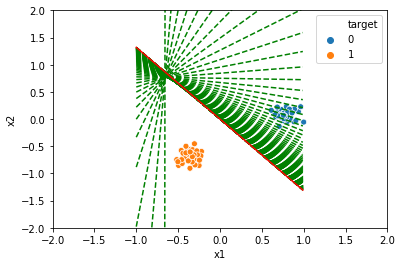

In [13]:
N_EPOCHS = 100

# init the model, loss and optimizer
net = Perceptron(2, 1)
optimizer = SGD(net.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()
net = net.to(DEVICE)

loss_history = []
for epoch in range(N_EPOCHS):
    print("training epoch {}".format(epoch))
    for xsample,ysample in zip(X, Y):

        # zero the gradients
        optimizer.zero_grad() 
        
        # batch preparation
        x = torch.Tensor(xsample).unsqueeze(0) # tensor([[0.8745, 0.5205]]) torch.Size([1, 2])
        y = torch.Tensor([ysample]).unsqueeze(0) # tensor([[1.]]) torch.Size([1, 1])
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        
        # forward pass
        out = net(x)
        
        # loss calculation
        loss = criterion(out, y)
        
        # calculating gradients
        loss.backward()
        
        # changing the weights by specified(in the optimizer init) learning rate
        optimizer.step()
        
        #append calculated loss to the history
        loss_history.append(loss.detach().cpu().numpy())
        
    plot_decision_boundry(net, X)
    
# at the end plot final solution in red
plot_decision_boundry(net, X, 'r-')
seaborn.scatterplot(x='x1',y='x2', hue='target', data=data)

        
print("input shape (BS, n_classes):", x.shape)
print("target shape (BS, 1):", y.shape)
print("output shape", out.shape)

Text(0,0.5,'loss (CE)')

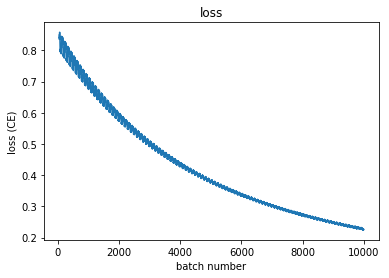

In [14]:
history = pd.DataFrame(loss_history, columns=['loss'])
history.loss.rolling(50).mean().plot()
plt.title("loss")
plt.xlabel("batch number")
plt.ylabel("loss (CE)")

#### Exercises
- Play with the training loop, enojoy the fact that you can inspect all the values dynamically. Consider using pdb.set_trace() for instance
- Can you edit the Perceptron class to create a Multi Layer Perceptron? (ie having more then 0 hidden layers)
- Initialize the the initial weights to 0. What do you think will happen? Can we still train the perceptron?
- What kind of gradient descnet are we using here? Stochastic? Batch? or Vanilla?
- What does detach do and why do we have to call it? (use google)
- Try adding a RELU activation after Linear unit - Will it train of not why?
- Try to implement a progress-bar (it might come in handy in our future exercises to)
 

In [27]:
from IPython.display import HTML
HTML('<iframe src=https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.19214&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false width=1000 height=600></iframe>')